In [12]:
import numpy as np
import pandas as pd
import quandl as qdl
from scipy.stats import linregress

In [2]:
data = qdl.get("WIKI/AAPL", start_date="2007-01-01", end_date="2017-05-01")

In [3]:
data_org = data.copy()

In [4]:
data.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio'], axis=1, inplace=True)

In [5]:
data.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2007-01-03,11.089468,11.126737,10.525291,10.769468,309579900.0
2007-01-04,10.801596,11.045773,10.772038,11.008504,211815100.0
2007-01-05,11.022640,11.077901,10.846576,10.930110,208685400.0
2007-01-08,11.047058,11.120311,10.959669,10.984086,199276700.0
2007-01-09,11.110030,11.949226,10.942962,11.896535,837324600.0


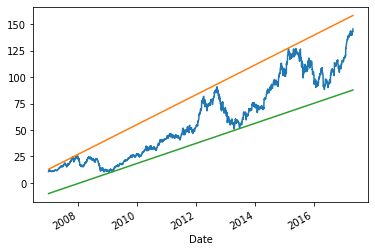

In [9]:
data0 = data.copy()
data0['date_id'] = ((data0.index.date - data0.index.date.min())).astype('timedelta64[D]')
data0['date_id'] = data0['date_id'].dt.days + 1

# high trend line
data1 = data0.copy()
while len(data1)>3:
    reg = linregress(x=data1['date_id'], y=data1['Adj. High'],)
    data1 = data1.loc[data1['Adj. High'] > reg[0] * data1['date_id'] + reg[1]]

reg = linregress(x=data1['date_id'], y=data1['Adj. High'],)
data0['high_trend'] = reg[0] * data0['date_id'] + reg[1]

# low trend line
data1 = data0.copy()
while len(data1)>3:
    reg = linregress(x=data1['date_id'],y=data1['Adj. Low'],)
    data1 = data1.loc[data1['Adj. Low'] < reg[0] * data1['date_id'] + reg[1]]

reg = linregress(x=data1['date_id'], y=data1['Adj. Low'],)
data0['low_trend'] = reg[0] * data0['date_id'] + reg[1]

# plot
data0['Adj. Close'].plot()
data0['high_trend'].plot()
data0['low_trend'].plot()

In [18]:
def trenddetector(list_of_index,array_of_data, order=1):
    coeffs = np.polyfit(list_of_index, list(array_of_data), order)
    slope = coeffs[-2]
    return float(slope)

In [22]:
def trendline(index,data, order=1):
    coeffs = np.polyfit(index, data, order)
    slope = coeffs[-2]
    return float(slope)

In [23]:
index=[1,2,3,4]
List=[1043,6582,5452,7571]
resultent=trendline(index,List)
print(resultent)  

1845.4000000000003


In [21]:
index=[1,2,3,4]
List=[1043,6582,5452,7571]
resultent=trenddetector(index,List)
print(resultent)

1845.4000000000003


In [24]:
data.shape

(2600, 5)